# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
#full url format "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'{city}&units=metric&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | pibor
City not found. Skipping...
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | palencia
Processing Record 5 of Set 1 | orchomenos
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ulladulla
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | quellon
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bushland beach
City not found. Skipping...
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | fu'an
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | port moresby
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | antofagasta
Processing Record 21 of Set

Processing Record 39 of Set 4 | roosevelt
Processing Record 40 of Set 4 | nandgaon
Processing Record 41 of Set 4 | fort mcmurray
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | kargil
Processing Record 44 of Set 4 | valparaiso
Processing Record 45 of Set 4 | metlili chaamba
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | gulu
Processing Record 48 of Set 4 | punta arenas
Processing Record 49 of Set 4 | andergrove
Processing Record 0 of Set 5 | korhogo
Processing Record 1 of Set 5 | mejit
Processing Record 2 of Set 5 | kapiri mposhi
Processing Record 3 of Set 5 | biaora
Processing Record 4 of Set 5 | buenaventura
Processing Record 5 of Set 5 | inari
Processing Record 6 of Set 5 | la libertad
Processing Record 7 of Set 5 | iskateley
Processing Record 8 of Set 5 | banes
Processing Record 9 of Set 5 | luanda
Processing Record 10 of Set 5 | hermanus
Processing Record 11 of Set 5 | masuguru
Processing Record 12 of Set 5 | sanctuary point
Processin

Processing Record 28 of Set 8 | kambar
Processing Record 29 of Set 8 | pyhajarvi
Processing Record 30 of Set 8 | nyuzen
Processing Record 31 of Set 8 | souda
Processing Record 32 of Set 8 | katsuren-haebaru
Processing Record 33 of Set 8 | arkhara
Processing Record 34 of Set 8 | mount pearl
Processing Record 35 of Set 8 | lerwick
Processing Record 36 of Set 8 | meadow lake
Processing Record 37 of Set 8 | mirnyy
Processing Record 38 of Set 8 | jequitinhonha
Processing Record 39 of Set 8 | cabo san lucas
Processing Record 40 of Set 8 | norman gardens
Processing Record 41 of Set 8 | ridder
Processing Record 42 of Set 8 | freetown
Processing Record 43 of Set 8 | vytegra
Processing Record 44 of Set 8 | palapye
Processing Record 45 of Set 8 | kulhudhuffushi
Processing Record 46 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 8 | siracusa
Processing Record 48 of Set 8 | rongelap
Processing Record 49 of Set 8 | tomiya
Processing Record 0 of Set 9 | montecristo
Process

Processing Record 16 of Set 12 | saint-francois
Processing Record 17 of Set 12 | gao
Processing Record 18 of Set 12 | vilyuysk
Processing Record 19 of Set 12 | berezovyy
Processing Record 20 of Set 12 | vobkent shahri
City not found. Skipping...
Processing Record 21 of Set 12 | tazacorte
Processing Record 22 of Set 12 | ra'anana
City not found. Skipping...
Processing Record 23 of Set 12 | barra do garcas
Processing Record 24 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 25 of Set 12 | lahat
Processing Record 26 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 27 of Set 12 | puerto madero
Processing Record 28 of Set 12 | zeya
Processing Record 29 of Set 12 | tucupita
Processing Record 30 of Set 12 | visby
Processing Record 31 of Set 12 | kilindoni
Processing Record 32 of Set 12 | el calafate
Processing Record 33 of Set 12 | boguchany
Processing Record 34 of Set 12 | dayton
Processing Record 35 of Set 12 | sittwe
Processing Record 36 of Set 12 | bor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.25,74,29,9.68,SH,1706998914
1,grytviken,-54.2811,-36.5092,9.04,94,100,5.07,GS,1706998915
2,palencia,42.4167,-4.5000,6.00,68,11,0.97,ES,1706998915
3,orchomenos,38.4929,22.9796,4.99,73,6,1.28,GR,1706998915
4,talnakh,69.4865,88.3972,-14.33,96,100,3.67,RU,1706998916


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.25,74,29,9.68,SH,1706998914
1,grytviken,-54.2811,-36.5092,9.04,94,100,5.07,GS,1706998915
2,palencia,42.4167,-4.5000,6.00,68,11,0.97,ES,1706998915
3,orchomenos,38.4929,22.9796,4.99,73,6,1.28,GR,1706998915
4,talnakh,69.4865,88.3972,-14.33,96,100,3.67,RU,1706998916


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

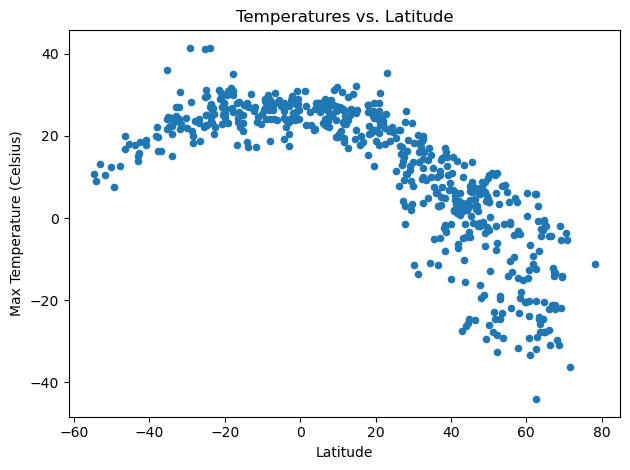

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat",y="Max Temp",kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Temperatures vs. Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

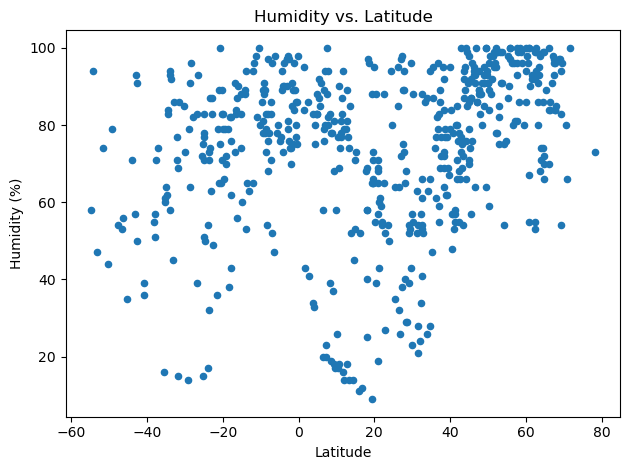

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat",y="Humidity",kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

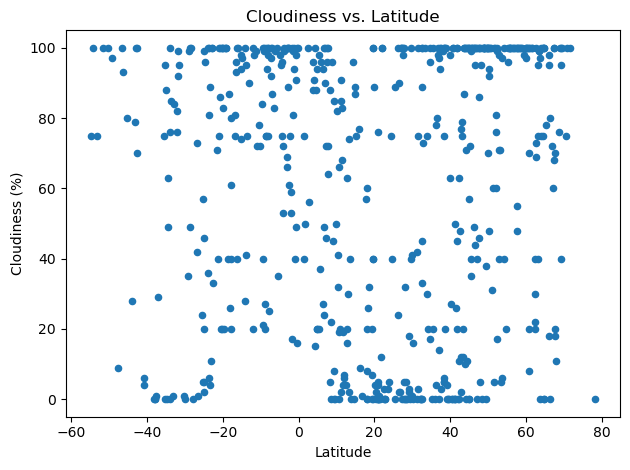

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat",y="Cloudiness",kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

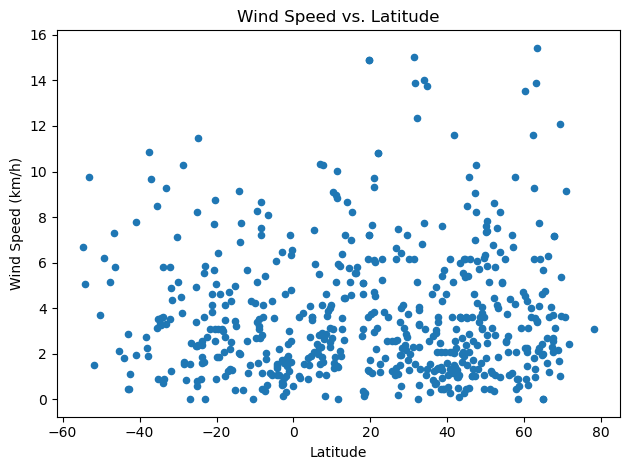

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat",y="Wind Speed",kind="scatter")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title("Wind Speed vs. Latitude")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def regression(x,y):
    (slope, intercept, rvalue,pvalue,stderr) = linregress(x,y)
    lineEq = x*slope + intercept
    lineFormula=f"y={round(slope,2)}x +{round(intercept,2)}"
    plt.scatter(x,y)
    plt.plot(x, lineEq, color="red")
    print(f'Line Equation: {lineFormula}')
    print(f'R. Value: {round(rvalue,4)}')
    plt.show()    

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,palencia,42.4167,-4.5000,6.00,68,11,0.97,ES,1706998915
3,orchomenos,38.4929,22.9796,4.99,73,6,1.28,GR,1706998915
4,talnakh,69.4865,88.3972,-14.33,96,100,3.67,RU,1706998916
10,klyuchi,52.2667,79.1667,-6.18,78,99,5.79,RU,1706998918
11,bethel,41.3712,-73.4140,3.34,55,0,5.14,US,1706998786


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.25,74,29,9.68,SH,1706998914
1,grytviken,-54.2811,-36.5092,9.04,94,100,5.07,GS,1706998915
5,adamstown,-25.0660,-130.1015,25.11,71,99,0.78,PN,1706998790
6,ulladulla,-35.3500,150.4667,24.22,60,95,3.11,AU,1706998916
7,port-aux-francais,-49.3500,70.2167,7.46,79,97,6.19,TF,1706998791


###  Temperature vs. Latitude Linear Regression Plot

Line Equation: y=-0.75x +33.8
R. Value: -0.8389


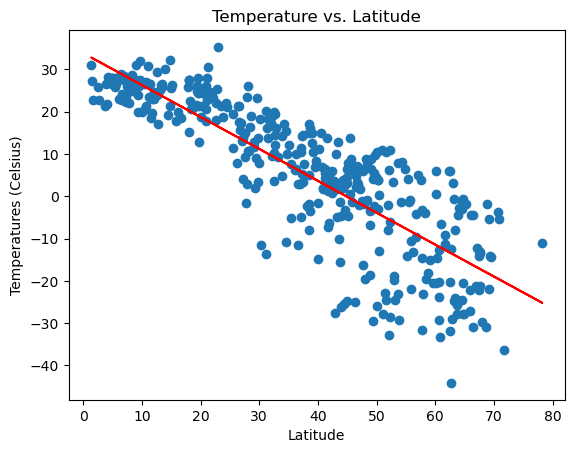

In [60]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Temperatures (Celsius)")
plt.title("Temperature vs. Latitude")
regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

plt.show()

Line Equation: y=0.19x +28.39
R. Value: 0.502


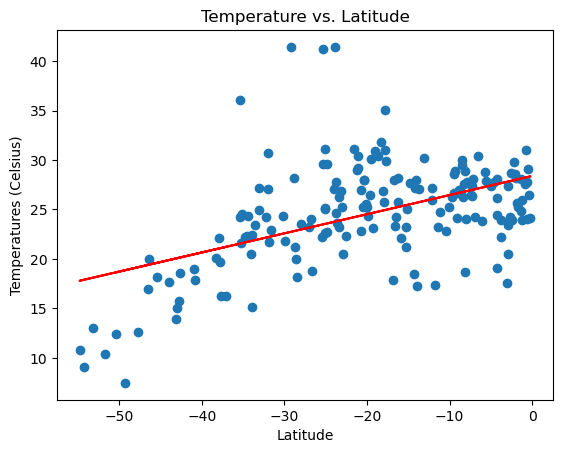

In [61]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Temperatures (Celsius)")
plt.title("Temperature vs. Latitude")
regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.show()

**Discussion about the linear relationship:** In these two graphs, there is strong evidence to suggest that local temperatures as one travels closer to the equator whether from the north or the south. From either direction, the data trends towards 30 degrees Celsius as the latitude approaches 0. There is stronger correlation in the northern hemisphere data than the southern data.

### Humidity vs. Latitude Linear Regression Plot

Line Equation: y=0.52x +54.74
R. Value: 0.448


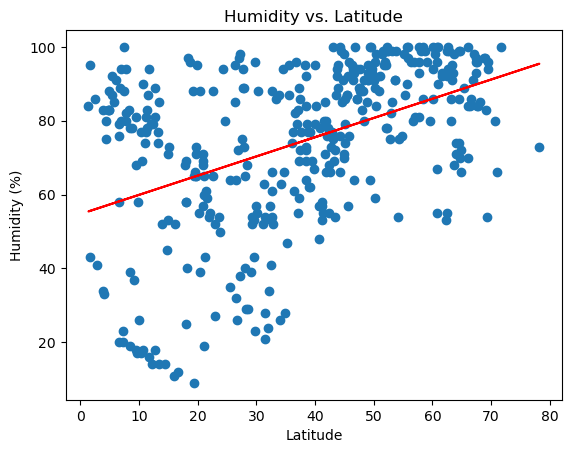

In [64]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude")
regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

Line Equation: y=0.56x +84.82
R. Value: 0.4131


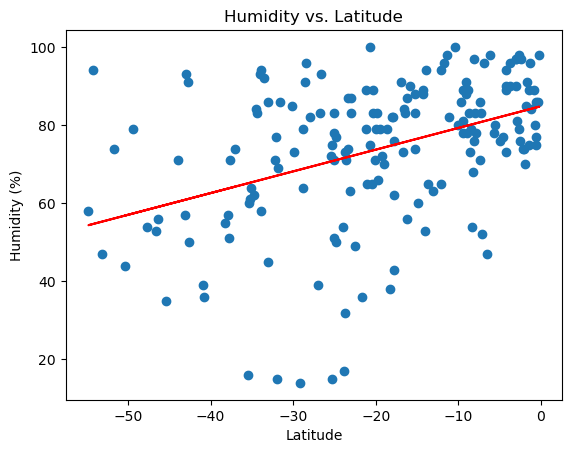

In [65]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude")
regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Both datasets demonstrate a moderate correlation between relative humidity perentage and latitude (r=.4480 &.4131). However, the northern hemisphere demonstrates more humidity towards latitudes further from the equator while the inverse is true for the southern hemisphere. Warmer air generally holds more moisture than cold air, so it is noteworthy that the colder, northern latitudes have more humidity than the ones closer to the equator. One potential lead worth further analysis is the type of biome at each city -- maybe there are more deserts in these areas? Additionally, is there a relationship stemming from the inverted seasons of the hemispheres? Further data analysis could investigate the weather patterns in different times of the year to check for consistency.

### Cloudiness vs. Latitude Linear Regression Plot

Line Equation: y=0.56x +35.26
R. Value: 0.2635


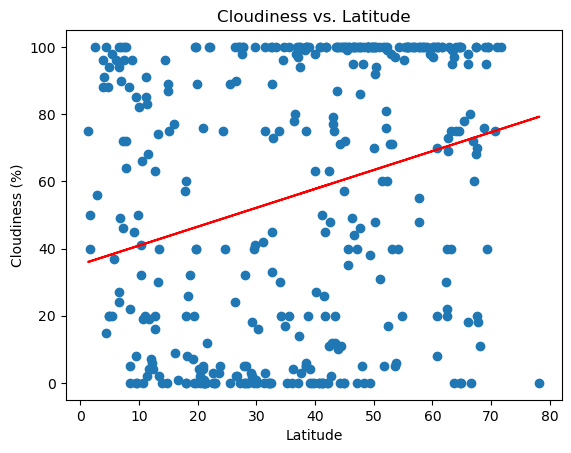

In [66]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude")
regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

Line Equation: y=0.55x +78.93
R. Value: 0.2199


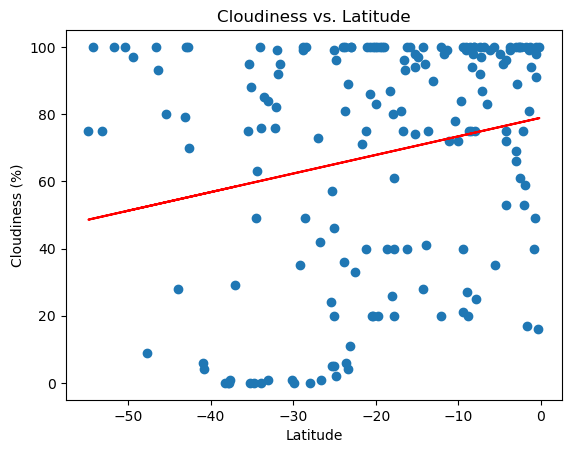

In [67]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude")
regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is a weak correlation between cloudiness in both hemispheres. Both regression lines have an r-value below 0.3. The data trends are consistent with those of the humidity graphs, which makes sense. As humidity increases cloud formation would follow suit. Areas with 100% humidity are currently raining or snowing, and humidity below 10% make any cloud cover difficult

### Wind Speed vs. Latitude Linear Regression Plot

Line Equation: y=-0.0x +3.85
R. Value: -0.0036


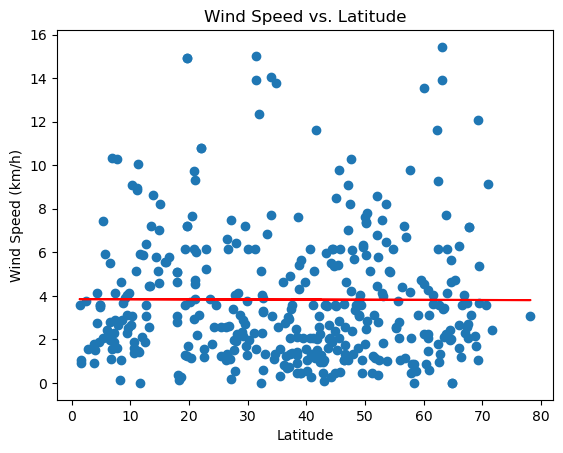

In [63]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title("Wind Speed vs. Latitude")
regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

Line Equation: y=-0.04x +2.71
R. Value: -0.2035


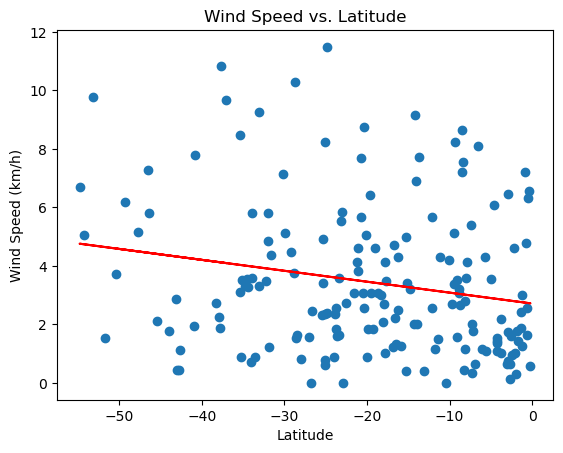

In [62]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.title("Wind Speed vs. Latitude")
regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.show()

**Discussion about the linear relationship:** There is very weak evidence of correlation between latitude and wind speed. The r-values for the northern and southern hemispheres are .004 and .2 respectively. In most cities, the wind speed was found between 0-6 km/hr. 